<a href="https://colab.research.google.com/github/andrnsgnmez/Asistente-virtual-viernes/blob/main/Proyecto_1_Vision_computacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/andrnsgnmez/DATASET-HERRAMIENTAS-DEED-LEARNING.git

Cloning into 'DATASET-HERRAMIENTAS-DEED-LEARNING'...
remote: Enumerating objects: 314, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 314 (delta 0), reused 0 (delta 0), pack-reused 311 (from 1)
Receiving objects: 100% (314/314), 864.40 MiB | 34.01 MiB/s, done.
Resolving deltas: 100% (6/6), done.
Updating files: 100% (283/283), done.


In [ ]:
!pip install tensorflow==2.15

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 113.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installatio

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential , models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import VGG16
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay , classification_report
from PIL import Image
import os
import cv2

In [ ]:
tf.__version__

'2.15.0'

In [ ]:
train_path = '/content/DATASET-HERRAMIENTAS-DEED-LEARNING/DATASET/train'
test_path = '/content/DATASET-HERRAMIENTAS-DEED-LEARNING/DATASET/test'

In [ ]:
# Rutas a las carpetas de imágenes
train_path = '/content/DATASET-HERRAMIENTAS-DEED-LEARNING/DATASET/train'
test_path = '/content/DATASET-HERRAMIENTAS-DEED-LEARNING/DATASET/test'

# Función para obtener tamaños de imágenes en una carpeta
def get_image_sizes(folder_path):
    image_sizes = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            # Verifica si el archivo es una imagen
            if file.endswith(('jpg', 'jpeg', 'png')):
                image_path = os.path.join(root, file)
                with Image.open(image_path) as img:
                    width, height = img.size
                    # Incluye el nombre de la subcarpeta (clase) para mayor claridad
                    class_name = os.path.basename(root)
                    image_sizes.append((class_name, file, width, height))
                    print(f"Clase: {class_name} - Imagen: {file} - Ancho: {width}, Alto: {height}")
    return image_sizes

# Obtener tamaños de imágenes en las carpetas de entrenamiento y prueba
train_image_sizes = get_image_sizes(train_path)
test_image_sizes = get_image_sizes(test_path)

# Opcional: imprime el tamaño más común o estadística general para el conjunto de entrenamiento
if train_image_sizes:
    unique_train_sizes = set((class_name, width, height) for class_name, _, width, height in train_image_sizes)
    print("\nTamaños únicos de las imágenes en el dataset de entrenamiento:")
    for size in unique_train_sizes:
        print(f"Clase: {size[0]} - Tamaño: {size[1]}x{size[2]}")
else:
    print("No se encontraron imágenes en el dataset de entrenamiento.")

# Opcional: imprime el tamaño más común o estadística general para el conjunto de prueba
if test_image_sizes:
    unique_test_sizes = set((class_name, width, height) for class_name, _, width, height in test_image_sizes)
    print("\nTamaños únicos de las imágenes en el dataset de prueba:")
    for size in unique_test_sizes:
        print(f"Clase: {size[0]} - Tamaño: {size[1]}x{size[2]}")
else:
    print("No se encontraron imágenes en el dataset de prueba.")



Clase: Destornillador - Imagen: 20231112_202400.jpg - Ancho: 3456, Alto: 3456
Clase: Destornillador - Imagen: 20231112_202459.jpg - Ancho: 3456, Alto: 3456
Clase: Destornillador - Imagen: 20231112_202141.jpg - Ancho: 3456, Alto: 3456
Clase: Destornillador - Imagen: 20231112_201752.jpg - Ancho: 3456, Alto: 3456
Clase: Destornillador - Imagen: 20231112_201734.jpg - Ancho: 3456, Alto: 3456
Clase: Destornillador - Imagen: 20231112_201510.jpg - Ancho: 3456, Alto: 3456
Clase: Destornillador - Imagen: 20231112_201755.jpg - Ancho: 3456, Alto: 3456
Clase: Destornillador - Imagen: 20231112_201730.jpg - Ancho: 3456, Alto: 3456
Clase: Destornillador - Imagen: 20231112_202248.jpg - Ancho: 3456, Alto: 3456
Clase: Destornillador - Imagen: 20231112_202231.jpg - Ancho: 3456, Alto: 3456
Clase: Destornillador - Imagen: 20231112_202445.jpg - Ancho: 3456, Alto: 3456
Clase: Destornillador - Imagen: 20231112_202033.jpg - Ancho: 3456, Alto: 3456
Clase: Destornillador - Imagen: 20231112_202413.jpg - Ancho: 345

In [ ]:
# parametros
img_height , img_width = 224 , 224
batch_size = 32

train_datagen = ImageDataGenerator(rescale = 1.0/255 , rotation_range = 20 , width_shift_range = 0.2 , height_shift_range = 0.2 , shear_range = 0.2 , zoom_range = 0.2 , horizontal_flip = True , fill_mode = 'nearest')
validation_datagen = ImageDataGenerator(rescale = 1.0/255)

train_generator = train_datagen.flow_from_directory(train_path , target_size = (img_height,img_width), batch_size = batch_size , class_mode ='categorical')
validation_generator = validation_datagen.flow_from_directory(test_path , target_size = (img_height,img_width), batch_size = batch_size , class_mode ='categorical')

Found 225 images belonging to 5 classes.
Found 55 images belonging to 5 classes.


In [ ]:
model = Sequential([Input(shape=(img_height, img_width, 3)),
        Conv2D(16, (3,3), activation = 'relu'), MaxPooling2D(pool_size=(2,2)),
        Conv2D(32,(3,3), activation='relu'), MaxPooling2D(pool_size=(2,2)),
        Conv2D(64,(3,3), activation='relu'), MaxPooling2D(pool_size=(2,2)),
        Conv2D(128,(3,3), activation='relu'), MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(5, activation = 'softmax')])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

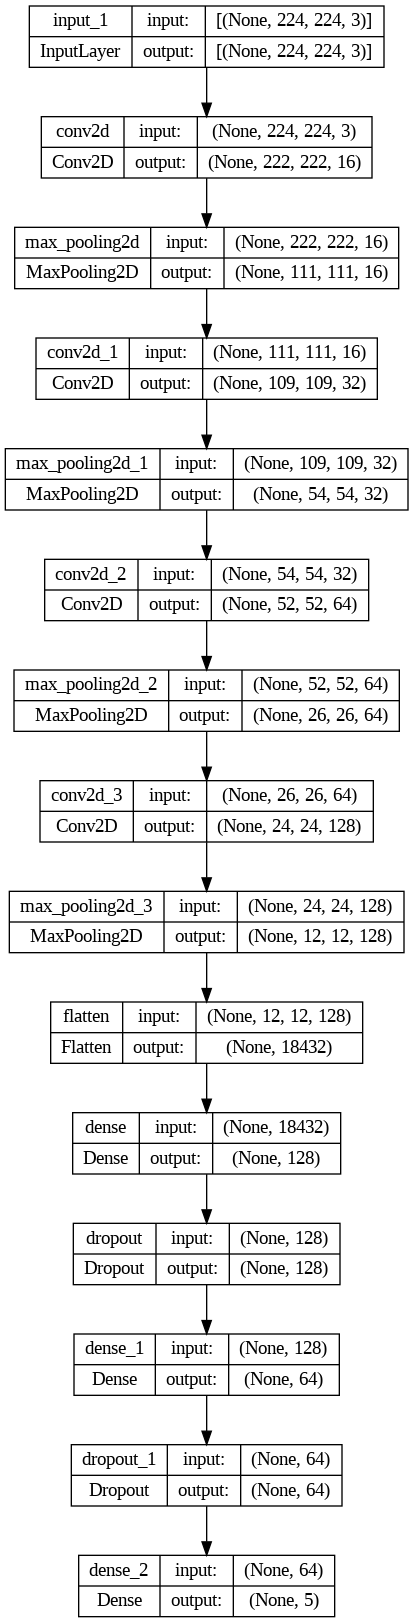

In [ ]:
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(loss = 'categorical_crossentropy',  optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
checkpoint_callback = ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

In [ ]:
Entrenamiento = model.fit(train_generator, steps_per_epoch= train_generator.samples // batch_size, validation_data= validation_generator, validation_steps= validation_generator.samples // batch_size, epochs = 100 , verbose = True , callbacks=[checkpoint_callback])

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 1.6766 - accuracy: 0.1813
Epoch 1: val_accuracy improved from -inf to 0.15625, saving model to best_model.h5
7/7 [==============================] - 33s 4s/step - loss: 1.6766 - accuracy: 0.1813 - val_loss: 1.6101 - val_accuracy: 0.1562
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7/7 [==============================] - ETA: 0s - loss: 1.6060 - accuracy: 0.2073
Epoch 2: val_accuracy improved from 0.15625 to 0.21875, saving model to best_model.h5
7/7 [==============================] - 28s 4s/step - loss: 1.6060 - accuracy: 0.2073 - val_loss: 1.6035 - val_accuracy: 0.2188
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 1.6055 - accuracy: 0.1969
Epoch 3: val_accuracy did not improve from 0.21875
7/7 [==============================] - 27s 4s/step - loss: 1.6055 - accuracy: 0.1969 - val_loss: 1.6035 - val_accuracy: 0.2188
Epoch 4/100
7/7 [==============================] - ETA: 0s - loss: 1.6027 - accuracy: 0.1969
Epoch 4: val_accuracy did not improve from 0.21875
7/7 [==============================] - 27s 4s/step - loss: 1.6027 - accuracy: 0.1969 - val_loss: 1.5944 - val_accuracy: 0.1875
Epoch 5/100
7/7 [==============================] - ETA: 0s - loss: 1.6013 - accuracy: 0.1813
Epoch 5: val_accuracy did not improve from 0.21875
7/7 [===============

In [ ]:
pred = model.evaluate(validation_generator)

2/2 [==============================] - 6s 2s/step - loss: 0.9207 - accuracy: 0.6000


2/2 [==============================] - 6s 2s/step


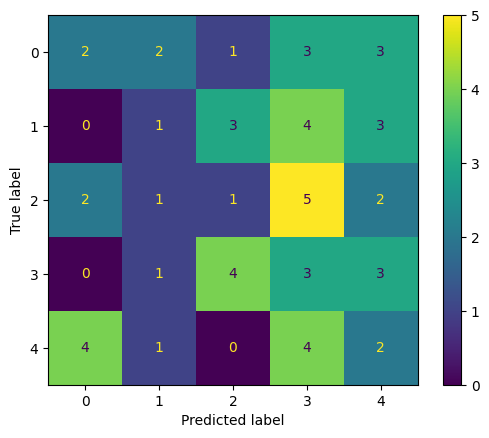

In [ ]:
y_true = validation_generator.classes
y_pred = model.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
report1 = classification_report(y_true,y_pred , target_names = train_generator.class_indices.keys())
print(report1)

                precision    recall  f1-score   support

Destornillador       0.25      0.18      0.21        11
   Llave mixta       0.17      0.09      0.12        11
      Martillo       0.11      0.09      0.10        11
    Pie de rey       0.16      0.27      0.20        11
        Pinzas       0.15      0.18      0.17        11

      accuracy                           0.16        55
     macro avg       0.17      0.16      0.16        55
  weighted avg       0.17      0.16      0.16        55



In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height,img_width,3))
base_model.trainable = False

In [ ]:
modelo2 = models.Sequential()
modelo2.add(base_model)
modelo2.add(layers.Flatten())
modelo2.add(layers.Dense(256, activation='relu'))
modelo2.add(layers.Dropout(0.5))
modelo2.add(layers.Dense(5, activation='softmax'))


In [ ]:
modelo2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
Entrenamiento2 = modelo2.fit(train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=100, verbose = True , callbacks=[checkpoint_callback])

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 4.6580 - accuracy: 0.2953
Epoch 1: val_accuracy did not improve from 0.71875
7/7 [==============================] - 31s 4s/step - loss: 4.6580 - accuracy: 0.2953 - val_loss: 2.3580 - val_accuracy: 0.3438
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 3.7268 - accuracy: 0.3368
Epoch 2: val_accuracy did not improve from 0.71875
7/7 [==============================] - 27s 4s/step - loss: 3.7268 - accuracy: 0.3368 - val_loss: 1.5941 - val_accuracy: 0.5938
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 2.5551 - accuracy: 0.4870
Epoch 3: val_accuracy did not improve from 0.71875
7/7 [==============================] - 26s 4s/step - loss: 2.5551 - accuracy: 0.4870 - val_loss: 0.8561 - val_accuracy: 0.7188
Epoch 4/100
7/7 [==============================] - ETA: 0s - loss: 1.6431 - accuracy: 0.5492
Epoch 4: val_accuracy improved from 0.71875 to 0.75000, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7/7 [==============================] - 26s 4s/step - loss: 1.6431 - accuracy: 0.5492 - val_loss: 0.7779 - val_accuracy: 0.7500
Epoch 5/100
7/7 [==============================] - ETA: 0s - loss: 1.0292 - accuracy: 0.6891
Epoch 5: val_accuracy did not improve from 0.75000
7/7 [==============================] - 27s 4s/step - loss: 1.0292 - accuracy: 0.6891 - val_loss: 0.7309 - val_accuracy: 0.7188
Epoch 6/100
7/7 [==============================] - ETA: 0s - loss: 0.9262 - accuracy: 0.6425
Epoch 6: val_accuracy did not improve from 0.75000
7/7 [==============================] - 27s 4s/step - loss: 0.9262 - accuracy: 0.6425 - val_loss: 0.7591 - val_accuracy: 0.7500
Epoch 7/100
7/7 [==============================] - ETA: 0s - loss: 0.7785 - accuracy: 0.6875
Epoch 7: val_accuracy did not improve from 0.75000
7/7 [==============================] - 30s 4s/step - loss: 0.7785 - accuracy: 0.6875 - val_loss: 0.6041 - val_accuracy: 0.7500
Epoch 8/100
7/7 [==============================] - ETA: 0s -

2/2 [==============================] - 5s 2s/step


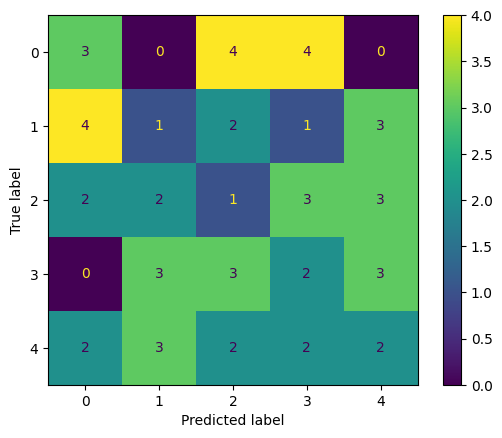

In [ ]:
y_true_2 = validation_generator.classes
y_pred_2 = modelo2.predict(validation_generator)
y_pred_2 = np.argmax(y_pred_2, axis=1)

cm2 = confusion_matrix(y_true_2, y_pred_2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot()
plt.show()